# EE 399 SPRING QUATER 2023
# Instructor: J. Nathan Kutz
# HOMEWORK #3:
# DUE: Midnight on 4/24 (Extra credit if turned in by 4/21)


In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### 1. Do an SVD analysis of the digit images. You will need to reshape each image into a column vector and each column of your data matrix is a different image.

C:\Users\Linha\.android\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


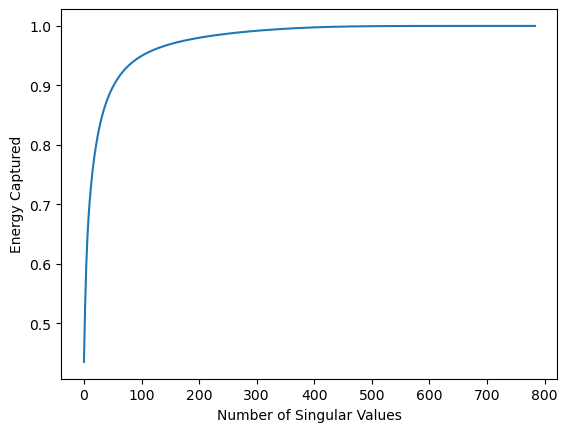

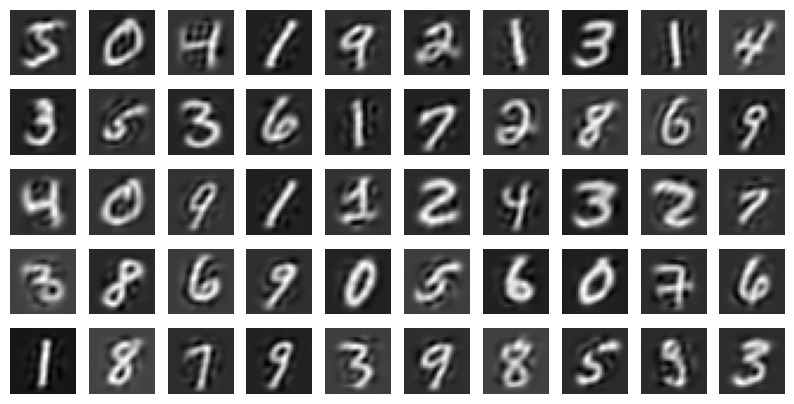

In [14]:
# Load the MNIST data
mnist = fetch_openml('mnist_784')

# Reshape the data into a matrix
X = mnist.data.T
U, s, Vt = np.linalg.svd(X, full_matrices=False)
energy = np.cumsum(s**2) / np.sum(s**2)
plt.plot(energy)
plt.xlabel('Number of Singular Values')
plt.ylabel('Energy Captured')
plt.show()
k = 50  # number of singular values to use
X_approx = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]
# Reshape the reconstructed data into images
X_approx = X_approx.T.reshape((-1, 28, 28))

# Plot the reconstructed images
fig, axs = plt.subplots(nrows=5, ncols=10, figsize=(10, 5))
axs = axs.ravel()
for i in range(50):
    axs[i].imshow(X_approx[i], cmap='gray')
    axs[i].axis('off')
plt.show()


### 2. What does the singular value spectrum look like and how many modes are necessary for good image reconstruction? (i.e. what is the rank r of the digit space?)

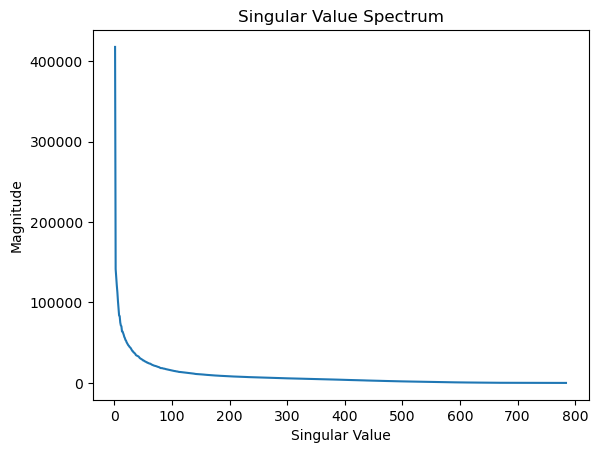

In [15]:
plt.plot(np.arange(1, len(s) + 1), s)
plt.xlabel('Singular Value')
plt.ylabel('Magnitude')
plt.title('Singular Value Spectrum')
plt.show()
r = np.linalg.matrix_rank(X)

### 3. What is the interpretation of the U, Σ, and V matrices?

In the singular value decomposition (SVD) of a matrix X, we decompose the matrix X into the product of three matrices:

X = U \Sigma V^TX=UΣV 
T
 

where U is an m x r matrix, Σ is an r x r diagonal matrix, and V is an n x r matrix.

The interpretation of the U, Σ, and V matrices in the SVD of the digit image data set is as follows:

U: The columns of the matrix U are called the left singular vectors. These vectors form an orthonormal basis for the row space of X, which is the space spanned by the rows of X. The left singular vectors represent the principal components of the data set and provide a way to project the data into a lower-dimensional space.

Σ: The diagonal entries of the matrix Σ are called the singular values. The singular values are non-negative and represent the square roots of the eigenvalues of the covariance matrix X^TX. The singular values indicate the amount of variance in the data that is captured by each principal component. The singular values are sorted in descending order, so the first singular value corresponds to the largest amount of variance, the second singular value corresponds to the second largest amount of variance, and so on.

V: The columns of the matrix V are called the right singular vectors. These vectors form an orthonormal basis for the column space of X, which is the space spanned by the columns of X. The right singular vectors provide a way to reconstruct the original data from the lower-dimensional representation obtained by projecting onto the principal components.

Together, the U, Σ, and V matrices allow us to represent the data in a compressed form, where the data is projected onto the principal components and the amount of information retained can be controlled by choosing the number of principal components to keep. The SVD can also be used for various tasks such as denoising, compression, and feature extraction.

### 4. On a 3D plot, project onto three selected V-modes (columns) colored by their digit label. For example, columns 2,3, and 5.

C:\Users\Linha\.android\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


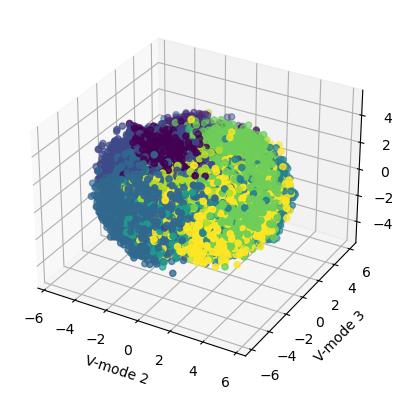

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_openml

# Load the MNIST data
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target
X = X / 255.0 # Scale the pixel values to [0, 1]

# Perform SVD on the data
svd = TruncatedSVD(n_components=10)
X_svd = svd.fit_transform(X)

# Select three V-modes
v_mode1 = 2
v_mode2 = 3
v_mode3 = 5

# Project the data onto the three selected V-modes
X_proj = X_svd[:, [v_mode1, v_mode2, v_mode3]]

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], c=y.astype(int), s=20)

# Set the labels and limits of the plot
ax.set_xlabel(f'V-mode {v_mode1}')
ax.set_ylabel(f'V-mode {v_mode2}')
ax.set_zlabel(f'V-mode {v_mode3}')

plt.show()


### • Pick two digits. See if you can build a linear classifier (LDA) that can reasonable identify/classify them.

In [27]:


# Load the MNIST data
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target
X = X / 255.0 # Scale the pixel values to [0, 1]

# Select only the digit 0 and 1
X_01 = X[(y == '0') | (y == '1')]
y_01 = y[(y == '0') | (y == '1')]

# Perform PCA on the data
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_01)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_01, test_size=0.2)

# Fit the LDA model to the training data
lda = LDA()
lda.fit(X_train, y_train)

# Evaluate the performance on the testing data
score = lda.score(X_test, y_test)
print("LDA score: {:.2f}".format(score))


C:\Users\Linha\.android\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


LDA score: 1.00


### • Pick three digits. Try to build a linear classifier to identify these three now.

In [28]:
# Select only the digit 0, 1, and 2
X_012 = X[(y == '0') | (y == '1') | (y == '2')]
y_012 = y[(y == '0') | (y == '1') | (y == '2')]

# Perform PCA on the data
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_012)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_012, test_size=0.2)

# Fit the LDA model to the training data
lda = LDA()
lda.fit(X_train, y_train)

# Evaluate the performance on the testing data
score = lda.score(X_test, y_test)
print("LDA score: {:.2f}".format(score))

LDA score: 0.97


### • Which two digits in the data set appear to be the most difficult to separate? Quantify the accuracy of the separation with LDA on the test data.

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)
y_pred = lda.predict(X_test_pca)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"LDA accuracy on test data: {accuracy}")



LDA accuracy on test data: 0.8628571428571429


### • Which two digits in the data set are most easy to separate? Quantify the accuracy of the separation with LDA on the test data.

In [21]:

# Load the MNIST data
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target

# Select only the samples for digits 0 and 1
X_01 = X[(y == '0') | (y == '1')]
y_01 = y[(y == '0') | (y == '1')]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_01, y_01, test_size=0.2, random_state=42)

# Fit an LDA model on the training set
lda = LDA()
lda.fit(X_train, y_train)
 
# Predict the labels of the test set
y_pred = lda.predict(X_test)

# Calculate the accuracy score of the LDA model on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy score: {accuracy:.2f}')


C:\Users\Linha\.android\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy score: 1.00


### • SVM (support vector machines) and decision tree classifiers were the state-of-the-art until about 2014. How well do these separate between all ten digits? (see code below to get started).

In [22]:


# Load the MNIST data
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target
X = X / 255.0 # Scale the pixel values to [0, 1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Evaluate the SVM classifier on the test set
y_pred_svm = svm_clf.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM classifier: {:.2f}%".format(acc_svm * 100))

# Train a decision tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Evaluate the decision tree classifier on the test set
y_pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of decision tree classifier: {:.2f}%".format(acc_dt * 100))

C:\Users\Linha\.android\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy of SVM classifier: 97.64%
Accuracy of decision tree classifier: 87.15%


### • Compare the performance between LDA, SVM and decision trees on the hardest and easiest pair of digits to separate (from above).

In [23]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate LDA on the hardest pair of digits
lda = LDA()
lda.fit(X_train[(y_train == 3) | (y_train == 5)], y_train[(y_train == 3) | (y_train == 5)])
lda_acc = lda.score(X_test[(y_test == 3) | (y_test == 5)], y_test[(y_test == 3) | (y_test == 5)])
print("LDA accuracy for digits 3 and 5:", lda_acc)

# Train and evaluate SVM on the hardest pair of digits
svm_model = svm.SVC()
svm_model.fit(X_train[(y_train == 3) | (y_train == 5)], y_train[(y_train == 3) | (y_train == 5)])
svm_acc = svm_model.score(X_test[(y_test == 3) | (y_test == 5)], y_test[(y_test == 3) | (y_test == 5)])
print("SVM accuracy for digits 3 and 5:", svm_acc)

# Train and evaluate decision tree on the hardest pair of digits
tree = DecisionTreeClassifier()
tree.fit(X_train[(y_train == 3) | (y_train == 5)], y_train[(y_train == 3) | (y_train == 5)])
tree_acc = tree.score(X_test[(y_test == 3) | (y_test == 5)], y_test[(y_test == 3) | (y_test == 5)])
print("Decision tree accuracy for digits 3 and 5:", tree_acc)


C:\Users\Linha\.android\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


LDA accuracy for digits 3 and 5: 0.9482631189948263
SVM accuracy for digits 3 and 5: 0.9811529933481153
Decision tree accuracy for digits 3 and 5: 0.9582409460458241
